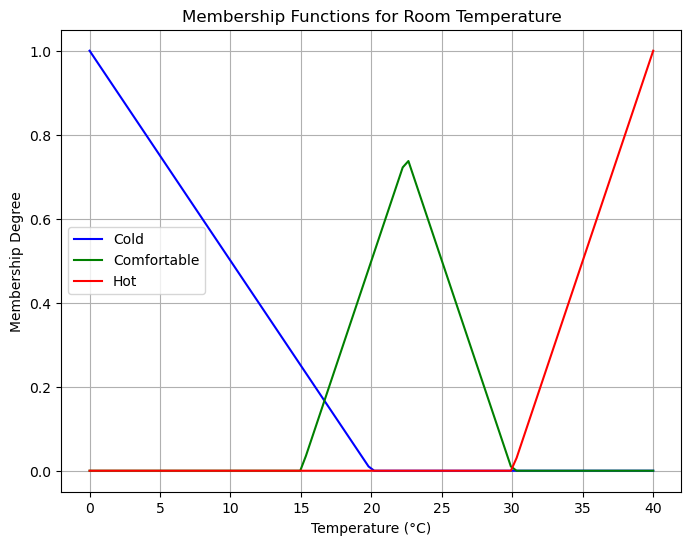

In [4]:
import numpy as np
import matplotlib.pyplot as plt # Define the temperature range
temperature = np.linspace(0, 40, 100) # Membership functions
def cold_membership(temp):
    return np.maximum(0, np.minimum(1, (20 - temp) / 20)) 
def comfortable_membership(temp):
    return np.maximum(0, np.minimum((temp - 15) / 10, (30 - temp) / 10)) 
def hot_membership(temp):
    return np.maximum(0, np.minimum(1, (temp - 30) / 10)) # Calculate membership values
cold = cold_membership(temperature)
comfortable = comfortable_membership(temperature) 
hot = hot_membership(temperature)
# Visualization 
plt.figure(figsize=(8, 6))
plt.plot(temperature, cold, label="Cold", color="blue") 
plt.plot(temperature, comfortable, label="Comfortable", color="green") 
plt.plot(temperature, hot, label="Hot", color="red") 
plt.title("Membership Functions for Room Temperature") 
plt.xlabel("Temperature (°C)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True) 
plt.show()

At 25°C:
Cold Membership: 0.00
Comfortable Membership: 0.83
Hot Membership: 0.00
Crisp Output (Net Action): 0.00%
No action required: Temperature is balanced.


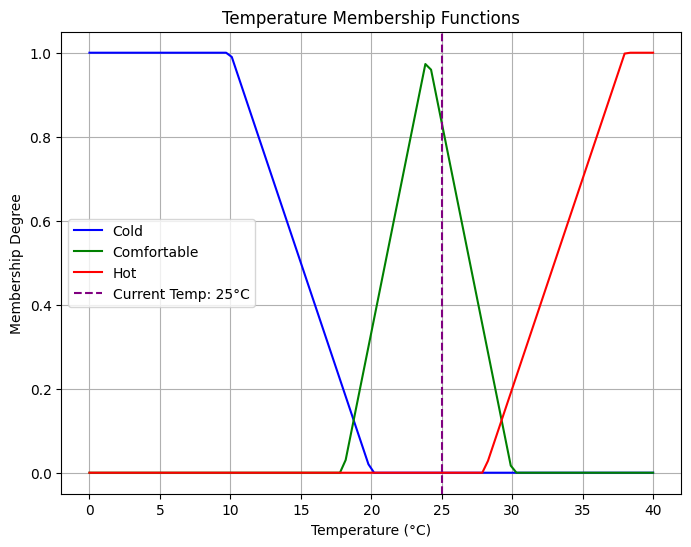

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Membership functions
def cold_membership(temp):
    """Membership function for 'Cold' temperature.""" 
    return np.maximum(0, np.minimum(1, (20 - temp) / 10))
def comfortable_membership(temp):
    """Membership function for 'Comfortable' temperature."""
    return np.maximum(0, np.minimum((temp - 18) / 6, (30 - temp) / 6)) 
def hot_membership(temp):
    """Membership function for 'Hot' temperature."""
    return np.maximum(0, np.minimum(1, (temp - 28) / 10))

# Fuzzy rules
def heating_degree(temp):
    """Heating percentage based on 'Cold' membership."""
    return cold_membership(temp) * 100 # Heating required in percentage 
def cooling_degree(temp):
    """Cooling percentage based on 'Hot' membership."""
    return hot_membership(temp) * 100 # Cooling required in percentage 
def defuzzify(temp):
    """Compute the crisp output as the weighted average of heating and cooling.""" 
    heating = heating_degree(temp)
    cooling = cooling_degree(temp)
    net_action = heating - cooling # Positive for heating, negative for cooling 
    return net_action

# Simulating the system for 25°C 
temperature = 25
cold_degree = cold_membership(temperature) 
comfortable_degree = comfortable_membership(temperature) 
hot_degree = hot_membership(temperature)
crisp_output = defuzzify(temperature)

print(f"At {temperature}°C:")
print(f"Cold Membership: {cold_degree:.2f}") 
print(f"Comfortable Membership: {comfortable_degree:.2f}") 
print(f"Hot Membership: {hot_degree:.2f}")
print(f"Crisp Output (Net Action): {crisp_output:.2f}%") 

if crisp_output > 0:
    print(f"Heating required: {crisp_output:.2f}%") 
elif crisp_output < 0:
    print(f"Cooling required: {abs(crisp_output):.2f}%") 
else:
    print("No action required: Temperature is balanced.") # Visualizing membership functions
    
def plot_membership_functions():
    """Plot the membership functions for 'Cold,' 'Comfortable,' and 'Hot'.""" 
    temperature_range = np.linspace(0, 40, 100)
    cold = [cold_membership(t) 
    for t in temperature_range]
    comfortable = [comfortable_membership(t) 
    for t in temperature_range] 
    hot = [hot_membership(t) 
    for t in temperature_range] 
    plt.figure(figsize=(8, 6))
    plt.plot(temperature_range, cold, label="Cold", color="blue") 
    plt.plot(temperature_range, comfortable, label="Comfortable", color="green") 
    plt.plot(temperature_range, hot, label="Hot", color="red")
    plt.axvline(x=temperature, color='purple', linestyle='--', label=f"Current Temp: {temperature}°C") 
    plt.title("Temperature Membership Functions")
    plt.xlabel("Temperature (°C)") 
    plt.ylabel("Membership Degree") 
    plt.legend()
    plt.grid(True) 
    plt.show()
    
plot_membership_functions()


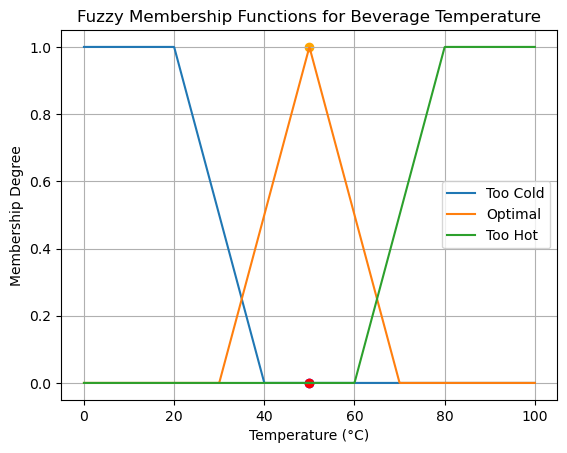

(0, 1.0, 0)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def too_cold(x):
    if x <= 20:
        return 1
    elif 20 < x <= 40:
        return (40 - x) / 20
    else:
        return 0
def optimal(x):
    if 30 < x <= 50:
        return (x - 30) / 20
    elif 50 < x <= 70:
        return (70 - x) / 20
    else:
        return 0
def too_hot(x):
    if x <= 60:
        return 0
    elif 60 < x <= 80:
        return (x - 60) / 20
    else:
        return 1
temperature = 50
too_cold_degree = too_cold(temperature)
optimal_degree = optimal(temperature)
too_hot_degree = too_hot(temperature)
temperatures = np.linspace(0, 100, 1000)
too_cold_values = [too_cold(temp) for temp in temperatures]
optimal_values = [optimal(temp) for temp in temperatures]
too_hot_values = [too_hot(temp) for temp in temperatures]
plt.plot(temperatures, too_cold_values, label='Too Cold')
plt.plot(temperatures, optimal_values, label='Optimal')
plt.plot(temperatures, too_hot_values, label='Too Hot')
plt.scatter([temperature], [too_cold_degree], color='blue')
plt.scatter([temperature], [optimal_degree], color='orange')
plt.scatter([temperature], [too_hot_degree], color='red')
plt.xlabel('Temperature (°C)')
plt.ylabel('Membership Degree')
plt.title('Fuzzy Membership Functions for Beverage Temperature')
plt.legend()
plt.grid(True)
plt.show()
(too_cold_degree, optimal_degree, too_hot_degree)


In [28]:
def fuzzy_speed_control(slipperiness):
    slippery_speed = max(0, min(1, 1 - slipperiness))
    normal_speed = max(0, min(1, 1 - abs(slipperiness - 0.5) * 2))
    dry_speed = max(0, min(1, slipperiness)) 
    return slippery_speed, normal_speed, dry_speed
def defuzzify(slippery_speed, normal_speed, dry_speed):
    speeds = {
        'slippery': 30,
        'normal': 50,  
        'dry': 70      
    }
    numerator = (speeds['slippery'] * slippery_speed +
                 speeds['normal'] * normal_speed +
                 speeds['dry'] * dry_speed)
    denominator = (slippery_speed + normal_speed + dry_speed)
    return numerator / denominator if denominator != 0    else 0
slipperiness_value = 0.6
slippery_speed, normal_speed, dry_speed = fuzzy_speed_control(slipperiness_value)
crisp_output = defuzzify(slippery_speed, normal_speed, dry_speed)
print(f'Crisp Output Speed: {crisp_output}')


Crisp Output Speed: 52.222222222222214
